In [ ]:
from typing import List, Optional, Tuple

import numpy as np
import torch
import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset, DataLoader, Dataset, Subset, random_split
from torchvision.datasets import MNIST


def _download_data() -> Tuple[Dataset, Dataset]:
    """Downloads (if necessary) and returns the MNIST dataset.

    Returns
    -------
    Tuple[MNIST, MNIST]
        The dataset for training and the dataset for testing MNIST.
    """
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )
    trainset = MNIST("./dataset", train=True, download=True, transform=transform)
    testset = MNIST("./dataset", train=False, download=True, transform=transform)
    return trainset, testset


trainset, testset = _download_data()
# print(list(range(0, len(trainset)//100)))
trainset = Subset(trainset, range(0, len(trainset)//100, 1)) #Daniel new line, less data selected
testset = Subset(testset, range(0, len(testset)//100, 1)) #Daniel new line, less data selected

num_clients = 10
iid = True
seed = 42

partition_size = int(len(trainset) / num_clients)
lengths = [partition_size] * num_clients
if iid:
    datasets = random_split(trainset, lengths, torch.Generator().manual_seed(seed))


print(len(trainset)) # 600
print(datasets[0][59]) # 60 per client if 60 000*val_ratio*fraction_evaluate*10/100 (10 clients)

# metrics_centralized evaluates global model accuracy on all test data
# metrics_distributed evaluates average of all client accuracy individually on metrics_distributed = data_set*fraction_evaluate*val_ratio*number_of_clients/100 (client specific data), round 0.6 => 1


In [ ]:
import numpy as np

# Load the .npy history file
history = np.load('docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=16_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy', allow_pickle=True).item()

# Print the history data as a dictionary (you can copy the output and share it here)
print(history)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_npy(file_name):
    return np.load(file_name, allow_pickle=True).item()

def plot_data(data, title, ylabel, xlabel='Epochs'):
    centralized_data = data['centralized']
    epochs = range(1, len(centralized_data.history[ylabel]) + 1)
    plt.plot(epochs, centralized_data.history[ylabel], label=ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

def main():
    file_name = 'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=16_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
    data = load_npy(file_name)

    plot_data(data, 'Centralized Model Accuracy', 'accuracy')
    plot_data(data, 'Centralized Model Loss', 'loss')

if __name__ == '__main__':
    main()



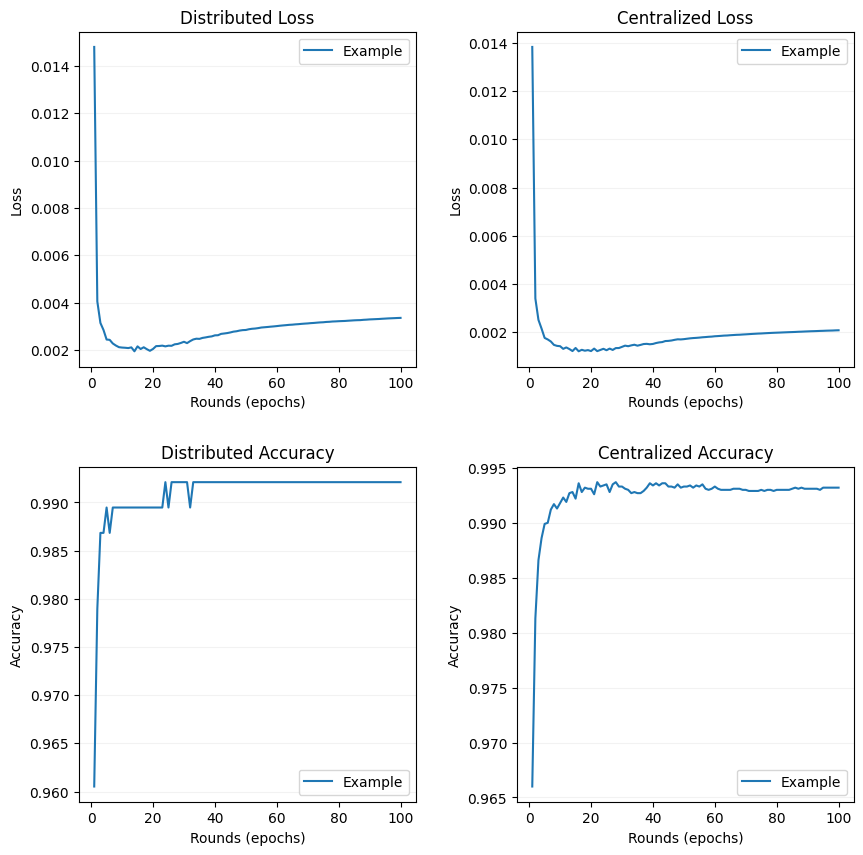

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path


def plot_data(hist, save_plot_path, expected_maximum, suffix="", graph_label=""):
    # Extract data from history object
    rounds_centralized, centralized_loss = zip(*hist.losses_centralized)
    rounds_distributed, distributed_loss = zip(*hist.losses_distributed)
    _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"])
    _, distributed_accuracy = zip(*hist.metrics_distributed["accuracy"])

    # Create the plot
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    # Plot distributed loss
    axs[0, 0].plot(rounds_distributed, distributed_loss, label=graph_label)
    axs[0, 0].set_title('Distributed Loss')
    axs[0, 0].set_xlabel('Rounds (epochs)')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].grid(axis='y', color='0.95')
    axs[0, 0].legend()

    # Plot distributed accuracy
    axs[1, 0].plot(rounds_distributed, distributed_accuracy, label=graph_label)
    axs[1, 0].set_title('Distributed Accuracy')
    axs[1, 0].set_xlabel('Rounds (epochs)')
    axs[1, 0].set_ylabel('Accuracy')
    axs[1, 0].grid(axis='y', color='0.95')
    axs[1, 0].legend()

    # Plot centralized loss
    axs[0, 1].plot(rounds_centralized[1:], centralized_loss[1:], label=graph_label)
    axs[0, 1].set_title('Centralized Loss')
    axs[0, 1].set_xlabel('Rounds (epochs)')
    axs[0, 1].set_ylabel('Loss')
    axs[0, 1].grid(axis='y', color='0.95')
    axs[0, 1].legend()

    # Plot centralized accuracy
    axs[1, 1].plot(rounds_centralized[1:], centralized_accuracy[1:], label=graph_label)
    axs[1, 1].set_title('Centralized Accuracy')
    axs[1, 1].set_xlabel('Rounds (epochs)')
    axs[1, 1].set_ylabel('Accuracy')
    axs[1, 1].grid(axis='y', color='0.95')
    axs[1, 1].legend()

    # Save the plot
    plt.savefig(save_plot_path / Path(f"all_plots_metrics{suffix}.png"))
    plt.show()
    plt.close()

if __name__ == '__main__':
    file_name = 'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=16_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
    data = parse_file(file_name)
    save_plot_path = Path("output_plots")
    save_plot_path.mkdir(parents=True, exist_ok=True)
    plot_data(data, save_plot_path, expected_maximum=0.99, suffix="_example", graph_label="Example")



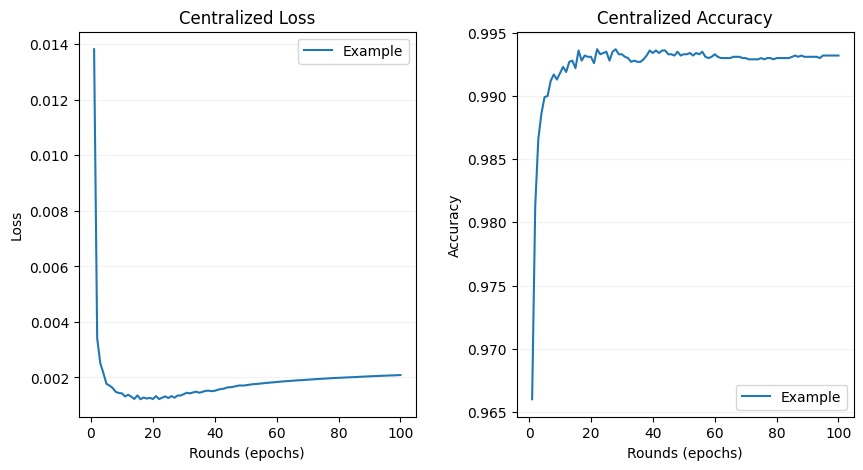

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path

def plot_data_centralized(hist, save_plot_path, suffix="", graph_label=""):
    # Extract data from history object
    rounds_centralized, centralized_loss = zip(*hist.losses_centralized)
    _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"])

    # Create the plot
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.3)

    # Plot centralized loss
    axs[0].plot(rounds_centralized[1:], centralized_loss[1:], label=graph_label)
    axs[0].set_title('Centralized Loss')
    axs[0].set_xlabel('Rounds (epochs)')
    axs[0].set_ylabel('Loss')
    axs[0].grid(axis='y', color='0.95')
    axs[0].legend()

    # Plot centralized accuracy
    axs[1].plot(rounds_centralized[1:], centralized_accuracy[1:], label=graph_label)
    axs[1].set_title('Centralized Accuracy')
    axs[1].set_xlabel('Rounds (epochs)')
    axs[1].set_ylabel('Accuracy')
    axs[1].grid(axis='y', color='0.95')
    axs[1].legend()

    # Save the plot
    plt.savefig(save_plot_path / Path(f"centralized_plots_metrics{suffix}.png"))
    plt.show()
    plt.close()

if __name__ == '__main__':
    file_name = 'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=16_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
    data = parse_file(file_name)
    save_plot_path = Path("output_plots")
    save_plot_path.mkdir(parents=True, exist_ok=True)
    plot_data_centralized(data, save_plot_path, suffix="_example", graph_label="Example")


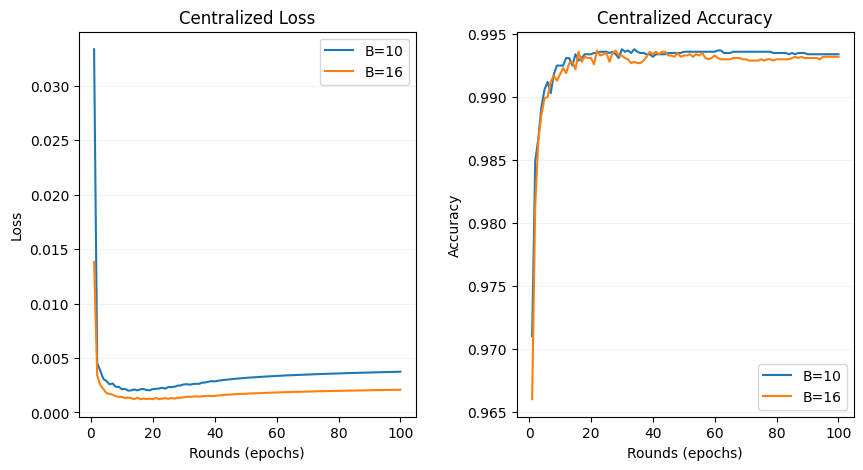

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path

def plot_data_centralized(hist_list, labels, save_plot_path, suffix=""):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.3)

    for hist, graph_label in zip(hist_list, labels):
        # Extract data from history object
        rounds_centralized, centralized_loss = zip(*hist.losses_centralized)
        _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"])

        # Plot centralized loss
        axs[0].plot(rounds_centralized[1:], centralized_loss[1:], label=graph_label)
        axs[0].set_title('Centralized Loss')
        axs[0].set_xlabel('Rounds (epochs)')
        axs[0].set_ylabel('Loss')
        axs[0].grid(axis='y', color='0.95')

        # Plot centralized accuracy
        axs[1].plot(rounds_centralized[1:], centralized_accuracy[1:], label=graph_label)
        axs[1].set_title('Centralized Accuracy')
        axs[1].set_xlabel('Rounds (epochs)')
        axs[1].set_ylabel('Accuracy')
        axs[1].grid(axis='y', color='0.95')

    axs[0].legend()
    axs[1].legend()

    # Save the plot
    plt.savefig(save_plot_path / Path(f"centralized_plots_metrics{suffix}.png"))
    plt.show()
    plt.close()

if __name__ == '__main__':
    file_name1 = 'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=10_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
    file_name2 = 'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=16_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
    
    data1 = parse_file(file_name1)
    data2 = parse_file(file_name2)
    
    save_plot_path = Path("output_plots")
    save_plot_path.mkdir(parents=True, exist_ok=True)
    
    plot_data_centralized([data1, data2], ["B=10", "B=16"], save_plot_path, suffix="_example")


In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

def plot_data_centralized(hist_list, labels, save_plot_path, suffix=""):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.3)

    for hist, graph_label in zip(hist_list, labels):
        # Extract data from history object
        rounds_centralized, centralized_loss = zip(*hist.losses_centralized)
        _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"])

        # Plot centralized loss
        axs[0].plot(rounds_centralized[1:], centralized_loss[1:], label=graph_label)
        # axs[0].plot(rounds_centralized[2:], centralized_loss[2:], label=graph_label)
        axs[0].set_title('Centralized Loss')
        axs[0].set_xlabel('Rounds (epochs)')
        axs[0].set_ylabel('Loss')
        axs[0].grid(axis='y', color='0.95')

        # Plot centralized accuracy
        axs[1].plot(rounds_centralized[1:], centralized_accuracy[1:], label=graph_label)
        # axs[1].plot(rounds_centralized[2:], centralized_accuracy[2:], label=graph_label)
        axs[1].set_title('Centralized Accuracy')
        axs[1].set_xlabel('Rounds (epochs)')
        axs[1].set_ylabel('Accuracy')
        axs[1].grid(axis='y', color='0.95')

    axs[0].legend()
    axs[1].legend()

    # Save the plot
    plt.savefig(save_plot_path / Path(f"centralized_plots_metrics{suffix}.png"))
    plt.show()
    plt.close()

def main(file_names, labels):
    history_objects = [parse_file(file_name) for file_name in file_names]
    
    save_plot_path = Path("output_plots")
    save_plot_path.mkdir(parents=True, exist_ok=True)
    
    plot_data_centralized(history_objects, labels, save_plot_path, suffix="_example")

if __name__ == '__main__':
    
    # # Batch Size
    # file_names = [
    #     'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=10_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
    #     'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=16_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
    #     'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
    #     'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=64_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
    #     'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=128_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
    # ]
    # labels = ["Batch size = 10", "Batch size = 16", "Batch size = 32", "Batch size = 64", "Batch size = 128"]

    # Client fraction
    file_names = [
        'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.2_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
        'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.4_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
        'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.6_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
        'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.8_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
        'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
    ]
    labels = ["Client fraction = 0.2", "Client fraction = 0.4","Client fraction = 0.6","Client fraction = 0.8","Client fraction = 1.0"]

    # # Number of clients
    # file_names = [
    #     'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=1_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
    #     'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=5_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
    #     'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
    #     'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=20_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
    #     'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=40_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
    #     'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=80_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
    # ]
    # labels = ["Number of clients = 1", "Number of clients = 5","Number of clients = 10","Number of clients = 20","Number of clients = 40","Number of clients = 80"]

    main(file_names, labels)


NameError: name 'parse_file' is not defined

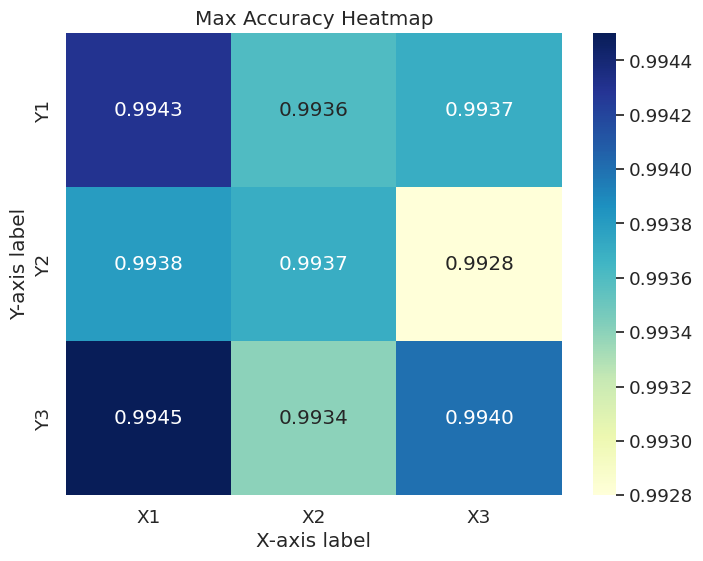

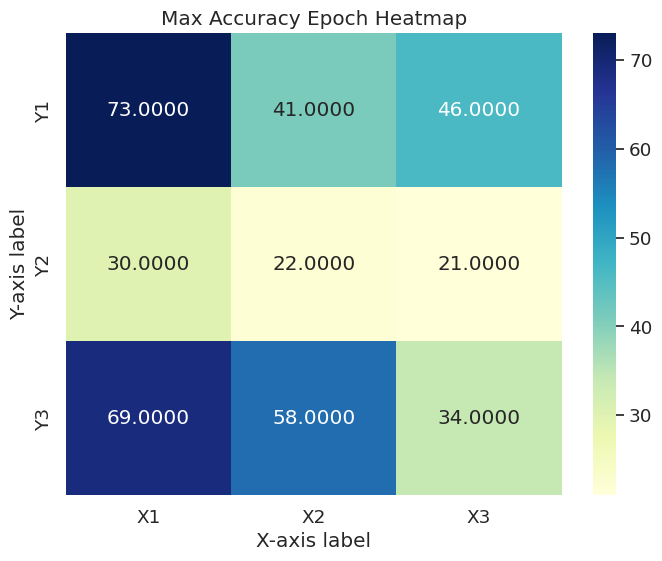

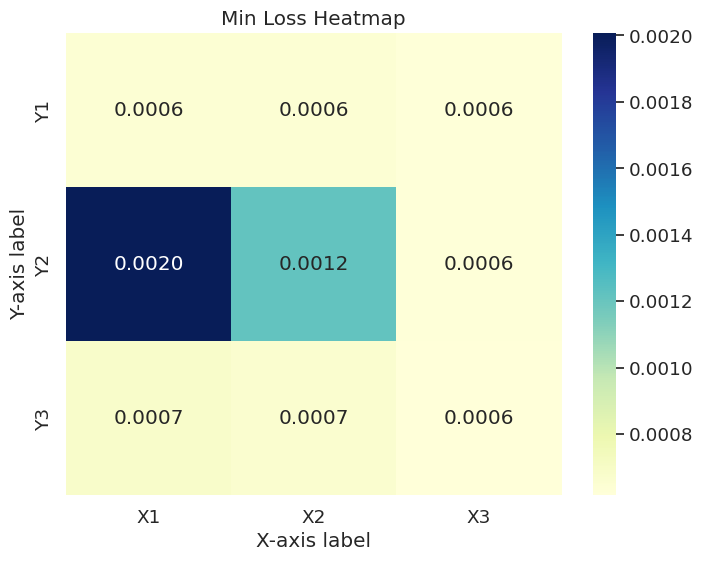

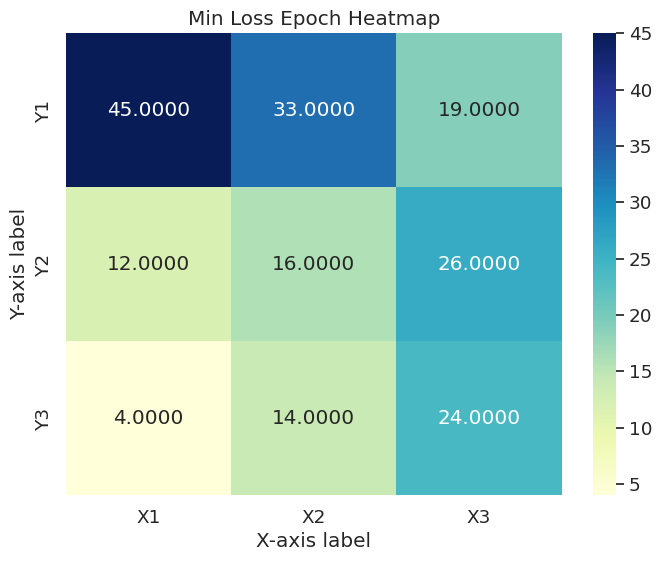

In [ ]:
# For creating heatmaps

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def extract_values(file_name):
    data = np.load(file_name, allow_pickle=True)
    hist = data.item()

    rounds, _ = zip(*hist.losses_centralized)
    _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"])
    
    max_accuracy = max(centralized_accuracy)
    max_accuracy_epoch = centralized_accuracy.index(max_accuracy)

    _, centralized_loss = zip(*hist.losses_centralized)
    min_loss = min(centralized_loss)
    min_loss_epoch = centralized_loss.index(min_loss)

    return max_accuracy, max_accuracy_epoch, min_loss, min_loss_epoch

def heatmap(data, x_labels, y_labels, xlabel, ylabel, title, save_plot_path, suffix="_example"):
    # fig, ax = plt.subplots(figsize=(10, 10))
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set(font_scale=1.2)
    # fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # # fig, ax = plt.subplots(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(data, annot=True, fmt='.4f', cmap='YlGnBu', xticklabels=x_labels, yticklabels=y_labels, ax=ax) #cmap='coolwarm'
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.savefig(save_plot_path / Path(f"heatmap{suffix}.png"))
    plt.show()
    plt.close()

def main(file_paths, x_labels, y_labels):
    accuracy_matrix = []
    accuracy_epoch_matrix = []
    loss_matrix = []
    loss_epoch_matrix = []

    for row_files in file_paths:
        accuracy_row = []
        accuracy_epoch_row = []
        loss_row = []
        loss_epoch_row = []

        for file in row_files:
            max_accuracy, max_accuracy_epoch, min_loss, min_loss_epoch = extract_values(file)
            accuracy_row.append(max_accuracy)
            accuracy_epoch_row.append(max_accuracy_epoch)
            loss_row.append(min_loss)
            loss_epoch_row.append(min_loss_epoch)

        accuracy_matrix.append(accuracy_row)
        accuracy_epoch_matrix.append(accuracy_epoch_row)
        loss_matrix.append(loss_row)
        loss_epoch_matrix.append(loss_epoch_row)

    save_plot_path = Path("output_plots")
    save_plot_path.mkdir(parents=True, exist_ok=True)

    heatmap(np.array(accuracy_matrix), x_labels, y_labels, 'X-axis label', 'Y-axis label', 'Max Accuracy Heatmap', save_plot_path, suffix="_accuracy")
    heatmap(np.array(accuracy_epoch_matrix), x_labels, y_labels, 'X-axis label', 'Y-axis label', 'Max Accuracy Epoch Heatmap', save_plot_path, suffix="_accuracy_epoch")
    heatmap(np.array(loss_matrix), x_labels, y_labels, 'X-axis label', 'Y-axis label', 'Min Loss Heatmap', save_plot_path, suffix="_loss")
    heatmap(np.array(loss_epoch_matrix), x_labels, y_labels, 'X-axis label', 'Y-axis label', 'Min Loss Epoch Heatmap', save_plot_path, suffix="_loss_epoch")

if __name__ == '__main__':
    file_paths = [
        [
            'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.2_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.4_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.6_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=10_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=16_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=1_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=5_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
        ]
    ]
    x_labels = ['X1', 'X2', 'X3']
    y_labels = ['Y1', 'Y2', 'Y3']

    main(file_paths, x_labels, y_labels)

    
    

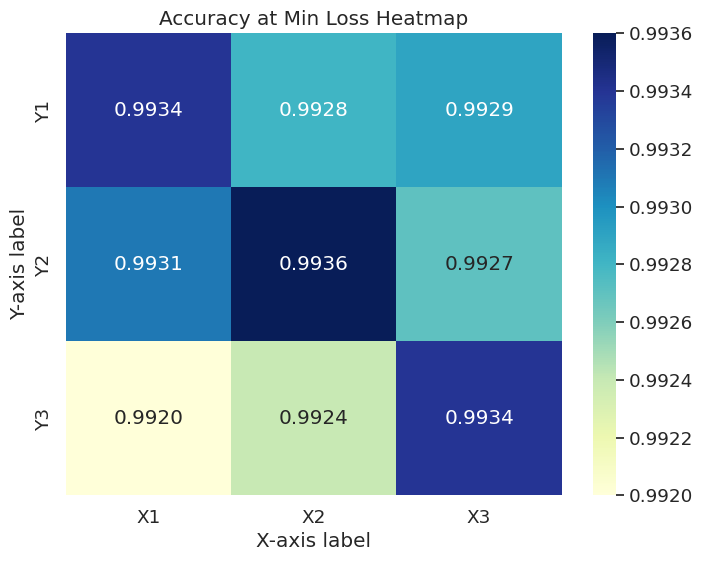

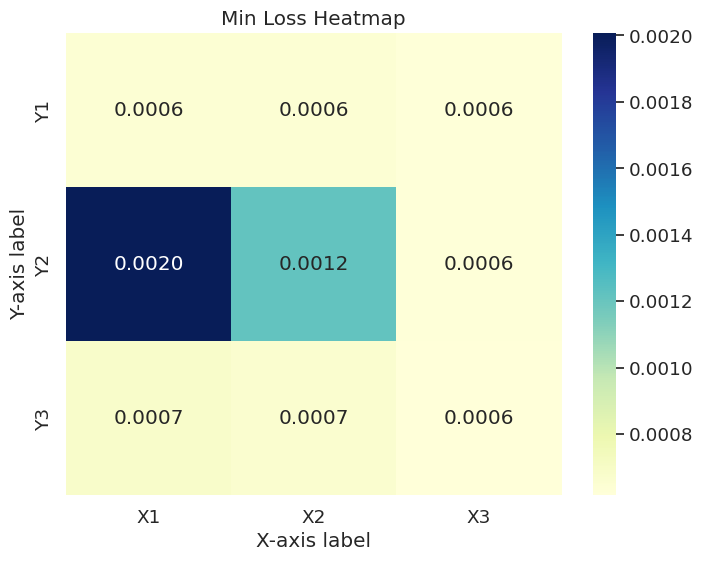

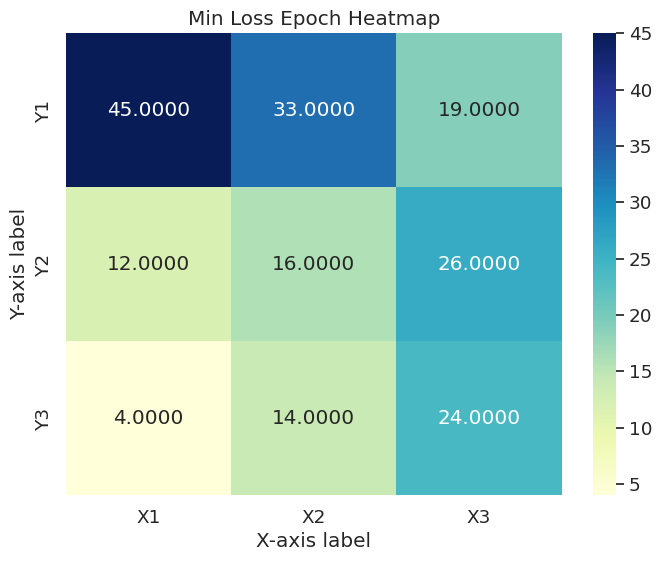

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def extract_values(file_name):
    data = np.load(file_name, allow_pickle=True)
    hist = data.item()

    rounds, _ = zip(*hist.losses_centralized)
    _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"])
    _, centralized_loss = zip(*hist.losses_centralized)

    min_loss = min(centralized_loss)
    min_loss_epoch = centralized_loss.index(min_loss)
    accuracy_at_min_loss = centralized_accuracy[min_loss_epoch]

    return accuracy_at_min_loss, min_loss, min_loss_epoch

def heatmap(data, x_labels, y_labels, xlabel, ylabel, title, save_plot_path, suffix="_example"):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(data, annot=True, fmt='.4f', cmap='YlGnBu', xticklabels=x_labels, yticklabels=y_labels, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.savefig(save_plot_path / Path(f"heatmap{suffix}.png"))
    plt.show()
    plt.close()

def main(file_paths, x_labels, y_labels):
    accuracy_matrix = []
    loss_matrix = []
    loss_epoch_matrix = []

    for row_files in file_paths:
        accuracy_row = []
        loss_row = []
        loss_epoch_row = []

        for file in row_files:
            accuracy_at_min_loss, min_loss, min_loss_epoch = extract_values(file)
            accuracy_row.append(accuracy_at_min_loss)
            loss_row.append(min_loss)
            loss_epoch_row.append(min_loss_epoch)

        accuracy_matrix.append(accuracy_row)
        loss_matrix.append(loss_row)
        loss_epoch_matrix.append(loss_epoch_row)

    save_plot_path = Path("output_plots")
    save_plot_path.mkdir(parents=True, exist_ok=True)

    heatmap(np.array(accuracy_matrix), x_labels, y_labels, 'X-axis label', 'Y-axis label', 'Accuracy at Min Loss Heatmap', save_plot_path, suffix="_accuracy")
    heatmap(np.array(loss_matrix), x_labels, y_labels, 'X-axis label', 'Y-axis label', 'Min Loss Heatmap', save_plot_path, suffix="_loss")
    heatmap(np.array(loss_epoch_matrix), x_labels, y_labels, 'X-axis label', 'Y-axis label', 'Min Loss Epoch Heatmap', save_plot_path, suffix="_loss_epoch")

if __name__ == '__main__':
    file_paths = [
        [
            'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.2_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.4_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/client_fraction_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=0.6_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=10_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=16_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/batch_size_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=1_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=5_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy',
            'docs/saveResults/num_clients_long_run/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=SaveModelStrategyFedAvg_Lr=0.1.npy'
        ]
    ]
    x_labels = ['X1', 'X2', 'X3']
    y_labels = ['Y1', 'Y2', 'Y3']

    main(file_paths, x_labels, y_labels)

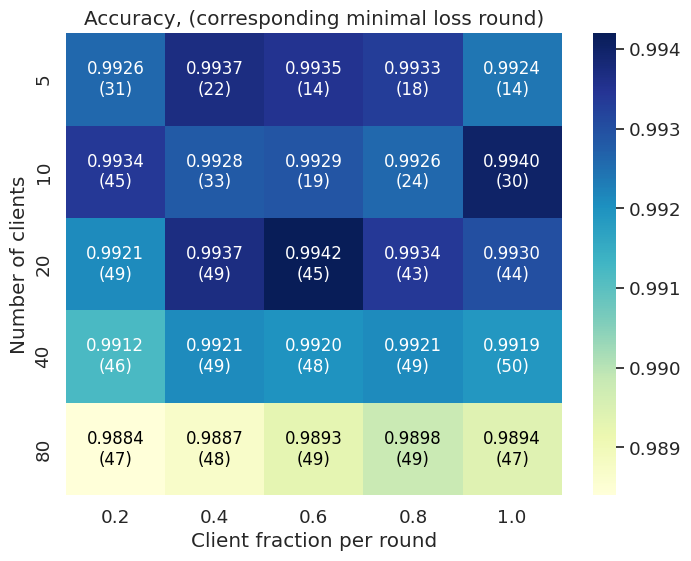

In [ ]:
# Accuracy at min loss round

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def extract_values(file_name):
    data = np.load(file_name, allow_pickle=True)
    hist = data.item()

    # _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"])
    # _, centralized_loss = zip(*hist.losses_centralized)
    _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"][0:51])
    _, centralized_loss = zip(*hist.losses_centralized[0:51])

    min_loss = min(centralized_loss)
    min_loss_epoch = centralized_loss.index(min_loss)
    accuracy_at_min_loss = centralized_accuracy[min_loss_epoch]

    return accuracy_at_min_loss, min_loss_epoch

# For text-color
def brightness(color):
    return (color[0] * 299 + color[1] * 587 + color[2] * 114) / 1000
# For text-color
def text_color_for_bg_color(bg_color):
    return 'black' if brightness(bg_color) > 0.6 else 'white' #0.5 else 'white'

def combined_heatmap(accuracy_data, epoch_data, x_labels, y_labels, xlabel, ylabel, title, save_plot_path):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set(font_scale=1.2)
    # sns.set(font_scale=1.0)
    # sns.heatmap(accuracy_data, annot=True, fmt='.4f', cmap='YlGnBu', xticklabels=x_labels, yticklabels=y_labels, ax=ax, cbar=False)
    sns.heatmap(accuracy_data, annot=False, fmt='.4f', cmap='YlGnBu', xticklabels=x_labels, yticklabels=y_labels, ax=ax, cbar=True)

    # for i in range(epoch_data.shape[0]):
    #     for j in range(epoch_data.shape[1]):
    #         text = f"({epoch_data[i, j]})"
    #         ax.text(j + 0.5, i + 0.7, text, horizontalalignment='center', verticalalignment='center', fontsize=12) #, color='white') #color='black')

    # For text-color
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    # for i in range(epoch_data.shape[0]):
    #     for j in range(epoch_data.shape[1]):
    #         bg_color = cmap(ax.collections[0].norm(accuracy_data[i, j]))
    #         text_color = text_color_for_bg_color(bg_color)

    #         accuracy_text = f"{accuracy_data[i, j]:.4f}"
    #         epoch_text = f"({epoch_data[i, j]})"
            
    #         ax.text(j + 0.5, i + 0.5, accuracy_text, horizontalalignment='center', verticalalignment='center', fontsize=12, color=text_color)
    #         ax.text(j + 0.5, i + 0.7, epoch_text, horizontalalignment='center', verticalalignment='center', fontsize=12, color=text_color)

    for i in range(epoch_data.shape[0]):
        for j in range(epoch_data.shape[1]):
            bg_color = cmap(ax.collections[0].norm(accuracy_data[i, j]))
            text_color = text_color_for_bg_color(bg_color)

            accuracy_text = f"{accuracy_data[i, j]:.4f}"
            # epoch_text = f"({epoch_data[i, j]}, {i,j})"
            epoch_text = f"({epoch_data[i, j]})"
            combined_text = f"{accuracy_text}\n{epoch_text}"

            # print(combined_text)
            
            ax.text(j + 0.5, i + 0.5, combined_text, horizontalalignment='center', verticalalignment='center', fontsize=12, color=text_color)
                    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.savefig(save_plot_path / Path("combined_heatmap.png"))
    plt.show()
    plt.close()

def main(file_paths, x_labels, y_labels):
    accuracy_matrix = []
    epoch_matrix = []

    for row_files in file_paths:
        accuracy_row = []
        epoch_row = []

        for file in row_files:
            accuracy_at_min_loss, min_loss_epoch = extract_values(file)
            accuracy_row.append(accuracy_at_min_loss)
            epoch_row.append(min_loss_epoch)

        accuracy_matrix.append(accuracy_row)
        epoch_matrix.append(epoch_row)

    save_plot_path = Path("output_plots")
    save_plot_path.mkdir(parents=True, exist_ok=True)

    # combined_heatmap(np.array(accuracy_matrix), np.array(epoch_matrix), x_labels, y_labels, 'Client fraction', 'Number of clients', 'Accuracy and Corresponding Epoch Heatmap', save_plot_path)
    combined_heatmap(np.array(accuracy_matrix), np.array(epoch_matrix), x_labels, y_labels, 'Client fraction per round', 'Number of clients', 'Accuracy, (corresponding minimal loss round)', save_plot_path)

if __name__ == '__main__':
    file_paths = [
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=0.2_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=0.4_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=0.6_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=0.8_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=0.2_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=0.4_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=0.6_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=0.8_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=0.2_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=0.4_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=0.6_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=0.8_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=0.2_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=0.4_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=0.6_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=0.8_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=0.2_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=0.4_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=0.6_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=0.8_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
    ]
    x_labels = ['0.2', '0.4', '0.6', '0.8', '1.0']
    y_labels = ['5', '10', '20', '40', '80']

    main(file_paths, x_labels, y_labels)

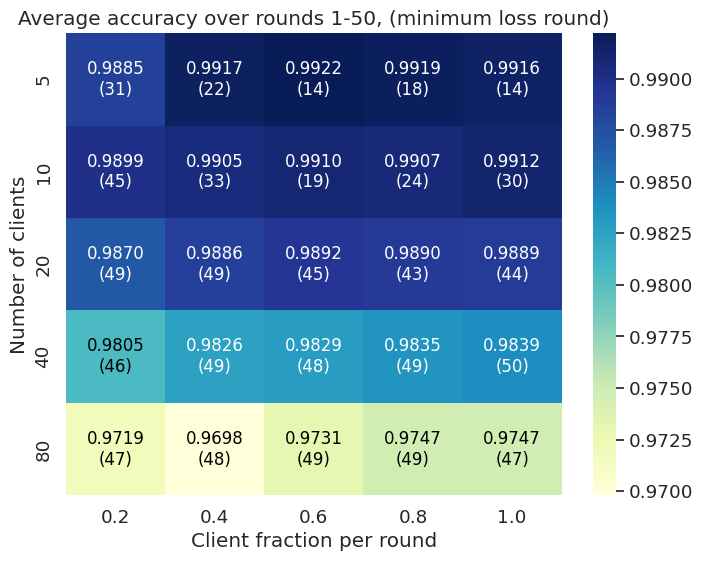

In [ ]:
# Avarage accuracies

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def extract_values(file_name):
    data = np.load(file_name, allow_pickle=True)
    hist = data.item()

    # _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"])
    # _, centralized_loss = zip(*hist.losses_centralized)
    starting_epoch = 1
    _, centralized_accuracy = zip(*hist.metrics_centralized["accuracy"][starting_epoch:51])
    _, centralized_loss = zip(*hist.losses_centralized[starting_epoch:51])

    # Not used here
    min_loss = min(centralized_loss)
    min_loss_epoch = centralized_loss.index(min_loss) + starting_epoch
    # avg acc
    # accuracy_at_min_loss = centralized_accuracy[min_loss_epoch]
    avg_accuracy = np.mean(centralized_accuracy)


    return avg_accuracy, min_loss_epoch

# For text-color
def brightness(color):
    return (color[0] * 299 + color[1] * 587 + color[2] * 114) / 1000
# For text-color
def text_color_for_bg_color(bg_color):
    return 'black' if brightness(bg_color) > 0.6 else 'white' #0.5 else 'white'

def combined_heatmap(accuracy_data, epoch_data, x_labels, y_labels, xlabel, ylabel, title, save_plot_path):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set(font_scale=1.2)
    # sns.set(font_scale=1.0)
    # sns.heatmap(accuracy_data, annot=True, fmt='.4f', cmap='YlGnBu', xticklabels=x_labels, yticklabels=y_labels, ax=ax, cbar=False)
    sns.heatmap(accuracy_data, annot=False, fmt='.4f', cmap='YlGnBu', xticklabels=x_labels, yticklabels=y_labels, ax=ax, cbar=True)

    # for i in range(epoch_data.shape[0]):
    #     for j in range(epoch_data.shape[1]):
    #         text = f"({epoch_data[i, j]})"
    #         ax.text(j + 0.5, i + 0.7, text, horizontalalignment='center', verticalalignment='center', fontsize=12) #, color='white') #color='black')

    # For text-color
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    # for i in range(epoch_data.shape[0]):
    #     for j in range(epoch_data.shape[1]):
    #         bg_color = cmap(ax.collections[0].norm(accuracy_data[i, j]))
    #         text_color = text_color_for_bg_color(bg_color)

    #         accuracy_text = f"{accuracy_data[i, j]:.4f}"
    #         epoch_text = f"({epoch_data[i, j]})"
            
    #         ax.text(j + 0.5, i + 0.5, accuracy_text, horizontalalignment='center', verticalalignment='center', fontsize=12, color=text_color)
    #         ax.text(j + 0.5, i + 0.7, epoch_text, horizontalalignment='center', verticalalignment='center', fontsize=12, color=text_color)

    for i in range(epoch_data.shape[0]):
        for j in range(epoch_data.shape[1]):
            bg_color = cmap(ax.collections[0].norm(accuracy_data[i, j]))
            text_color = text_color_for_bg_color(bg_color)

            accuracy_text = f"{accuracy_data[i, j]:.4f}"
            # epoch_text = f"({epoch_data[i, j]}, {i,j})"
            epoch_text = f"({epoch_data[i, j]})"
            combined_text = f"{accuracy_text}\n{epoch_text}"

            # print(combined_text)
            
            ax.text(j + 0.5, i + 0.5, combined_text, horizontalalignment='center', verticalalignment='center', fontsize=12, color=text_color)
                    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.savefig(save_plot_path / Path("combined_heatmap.png"))
    plt.show()
    plt.close()

def main(file_paths, x_labels, y_labels):
    accuracy_matrix = []
    epoch_matrix = []

    for row_files in file_paths:
        accuracy_row = []
        epoch_row = []

        for file in row_files:
            accuracy_at_min_loss, min_loss_epoch = extract_values(file)
            accuracy_row.append(accuracy_at_min_loss)
            epoch_row.append(min_loss_epoch)

        accuracy_matrix.append(accuracy_row)
        epoch_matrix.append(epoch_row)

    save_plot_path = Path("output_plots")
    save_plot_path.mkdir(parents=True, exist_ok=True)

    # combined_heatmap(np.array(accuracy_matrix), np.array(epoch_matrix), x_labels, y_labels, 'Client fraction', 'Number of clients', 'Accuracy and Corresponding Epoch Heatmap', save_plot_path)
    combined_heatmap(np.array(accuracy_matrix), np.array(epoch_matrix), x_labels, y_labels, 'Client fraction per round', 'Number of clients', 'Average accuracy over rounds 1-50, (minimum loss round)', save_plot_path)

if __name__ == '__main__':
    file_paths = [
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=0.2_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=0.4_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=0.6_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=0.8_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=5_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=0.2_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=0.4_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=0.6_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=0.8_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=10_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=0.2_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=0.4_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=0.6_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=0.8_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=20_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=0.2_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=0.4_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=0.6_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=0.8_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=40_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
        [
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=0.2_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=0.4_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=0.6_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=0.8_Ef=1.0_B=32_E=1_R=50_Opt=saveFedAvg_Lr=0.1.npy',
            'docs/heat_map_client_fraction_num_clients/plots_and_history/hist_iid_balanced_C=80_Cf=1.0_Ef=1.0_B=32_E=1_R=100_Opt=saveFedAvg_Lr=0.1.npy'
        ],
    ]
    x_labels = ['0.2', '0.4', '0.6', '0.8', '1.0']
    y_labels = ['5', '10', '20', '40', '80']

    main(file_paths, x_labels, y_labels)

In [ ]:
np.load('docs/resultsDanielAvg/hist_iid_balanced_C=10_B=10_E=1_R=2_F=1.0.npy', allow_pickle=True)


In [ ]:
np.load("round-1-weights.npz", allow_pickle=True)


import numpy as np

# Load the saved npz file
data = np.load(f"docs/hannesResults/{cfg.current_test}/round-{server_round}-weights.npz")

# Print the names of the ndarrays in the file
print(data.files)

# Access the ndarrays by their names
array1 = data['arr_0']
array2 = data['arr_1']